# Test méthode classique de débruitage

## Filtre moyenneur

In [69]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as scp
from scipy import ndimage

In [70]:
# Bloc de fonctions utiles 

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Affichage histogramme d'une image
def display_histogram(image):
    plt.figure()
    plt.hist(image.flatten(), bins=256, range=(0,256), density=True, color='black', alpha=0.75)
    plt.title('Histogramme')
    plt.xlabel('Valeurs des pixels')
    plt.ylabel('Fréquence')
    plt.show()


# Importer une image en niveaux de gris
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def psnr(original_image, processed_image):
    # Convertir les images en float pour éviter les problèmes d'arrondi
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    
    # Calculer la MSE (Mean Squared Error)
    mse = np.mean((original_image - processed_image) ** 2)
    
    # Si la MSE est nulle, les deux images sont identiques
    if mse == 0:
        return float('inf')
    
    # Calculer le PSNR
    max_pixel = 255.0  # Valeur maximale des pixels pour une image 8 bits
    psnr = 10 * np.log10((max_pixel ** 2) / mse)
    
    return psnr


In [71]:
h1 = np.ones((3, 3))
h1 = 1/9 * h1

h2 = np.ones((9, 9))
h2 = 1/81 * h2

def convolve2d(image, h):
    # taille de l'image 
    image_height, image_width = image.shape
    # taille du filtre 
    kernel_height, kernel_width = h.shape
    
    # déterminer combien de pixels de remplissage sont nécessaires autour de l'image
    pad_height = kernel_height // 2  # Pour le haut et le bas
    pad_width = kernel_width // 2      # Pour la gauche et la droite

    # remplissage de zéros autour de l'image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    
    # une image vide qui aura la même taille que l'image d'origine
    output = np.zeros_like(image)
    
    # appliquer le filtre à chaque pixel de l'image
    for i in range(image_height):
        for j in range(image_width):
            # section de l'image qui correspond à la taille du filtre
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # nouveau pixel en effectuant un calcul de moyenne pondérée
            output[i, j] = np.sum(region * h)
    
    return output



[[169 169 169 ... 176 160 133]
 [169 169 169 ... 176 160 133]
 [169 169 169 ... 176 160 133]
 ...
 [ 44  44  51 ... 108 103 102]
 [ 45  45  56 ... 107 109 111]
 [ 45  45  56 ... 107 109 111]]


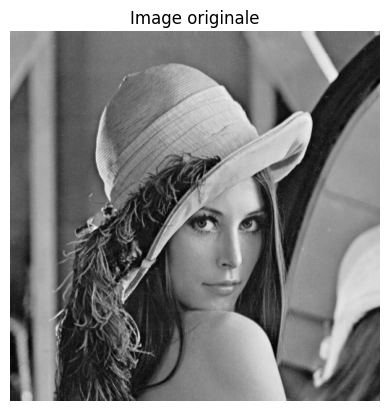

In [72]:
# Bloc de test d'affichage de l'image et de son histogramme

# Importer l'image
image = import_image('lena.pgm')
print(image)
display_image(image,'Image originale')
# display_histogram(image)

[[0.72249547 0.61823475 0.78983883 ... 0.75910504 0.67764125 0.59481688]
 [0.60704776 0.60252664 0.55833688 ... 0.76702596 0.57509809 0.45358151]
 [0.53992998 0.55517416 0.52323655 ... 0.41128432 0.5162654  0.75522582]
 ...
 [0.3070385  0.22476937 0.42097462 ... 0.48833641 0.31716327 0.53941189]
 [0.0476061  0.11897088 0.13560776 ... 0.52563779 0.27053494 0.47465292]
 [0.12773438 0.14500736 0.41765581 ... 0.34994142 0.38809738 0.53672215]]


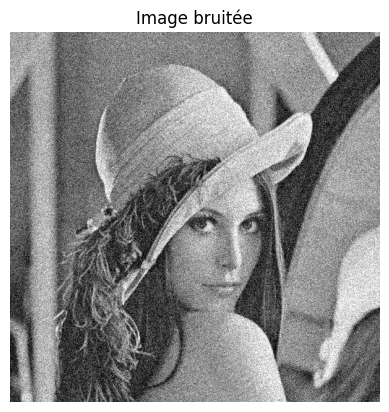

In [73]:
# Ajout de bruit à l'image
image_noised = ski.util.random_noise(image, mean=0, var=0.01)
print(image_noised)
display_image(image_noised,'Image bruitée')

[[0.19989669 0.24217107 0.28100072 ... 0.30203506 0.25887315 0.21304976]
 [0.23801162 0.28846381 0.33467582 ... 0.34784465 0.29836817 0.24455887]
 [0.27965898 0.33888583 0.39461724 ... 0.37970441 0.32467401 0.26523491]
 ...
 [0.09502301 0.10798169 0.12471567 ... 0.21657552 0.18843742 0.16368464]
 [0.08014062 0.09191387 0.10464956 ... 0.18824693 0.1624694  0.14111841]
 [0.06714178 0.07770933 0.08881511 ... 0.15827001 0.1362439  0.11983373]]


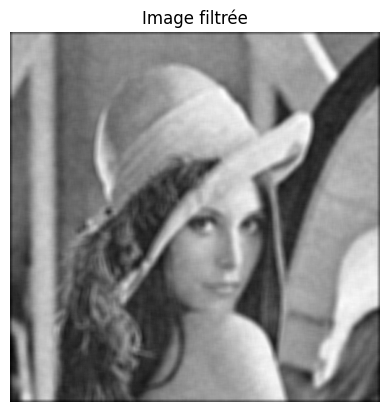

In [74]:
# Bloc de test de la fonction de filtrage

# Appliquer le filtre moyen
filtered_image = convolve2d(image_noised, h2)
print(filtered_image)
display_image(filtered_image,'Image filtrée')

In [75]:
# Test PSNR entre l'image originale et l'image débruitée
psnr_value = psnr(image, filtered_image)
print('PSNR entre l\'image originale et l\'image débruitée :', psnr_value)

PSNR entre l'image originale et l'image débruitée : 5.374645501006311
